In [466]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as prof

# EDA - Proyecto Individual - ENACOM

`Observo la evolucion de la cantidad habitantes conectados por cada 100 en todo el pais`

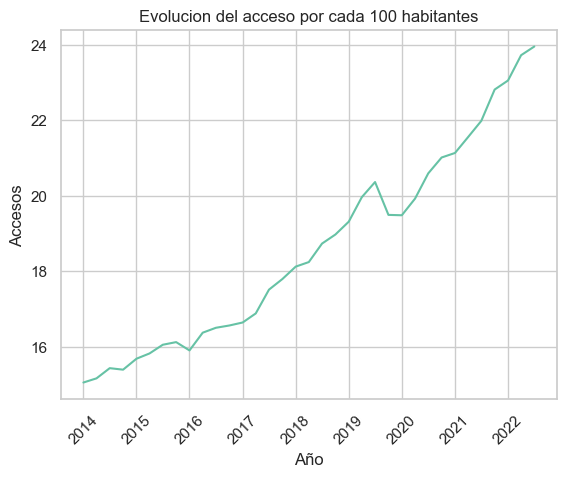

In [467]:
conexiones_pais_localidad = pd.read_pickle(r'db_eda\conexiones_pais_100.pkl')

# Crear el gráfico de línea
plt.plot(conexiones_pais_100['trim_anio'], conexiones_pais_100['cada_100_hab'])

# Personalizar el gráfico
plt.title('Evolucion del acceso por cada 100 habitantes')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.xticks(rotation=45)
plt.show()

> Observo que la evolucion desde el 2020 es constante

In [468]:
conexiones_pais_provincia = pd.read_pickle(r'db_eda\conexiones_pais_provincia.pkl')
conexiones_pais_provincia.info()


# Generar el informe EDA Automatico para explorar el dataset

conexiones_pais_provincia_EDA = prof.ProfileReport(conexiones_pais_provincia)

report = prof.ProfileReport(conexiones_pais_provincia)

report.to_file('reporte.html')


<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 839 to 0
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   anio          840 non-null    int64         
 1   trimestre     840 non-null    int64         
 2   provincia     840 non-null    object        
 3   cada_100_hog  840 non-null    float64       
 4   trim_anio     840 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 39.4+ KB


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

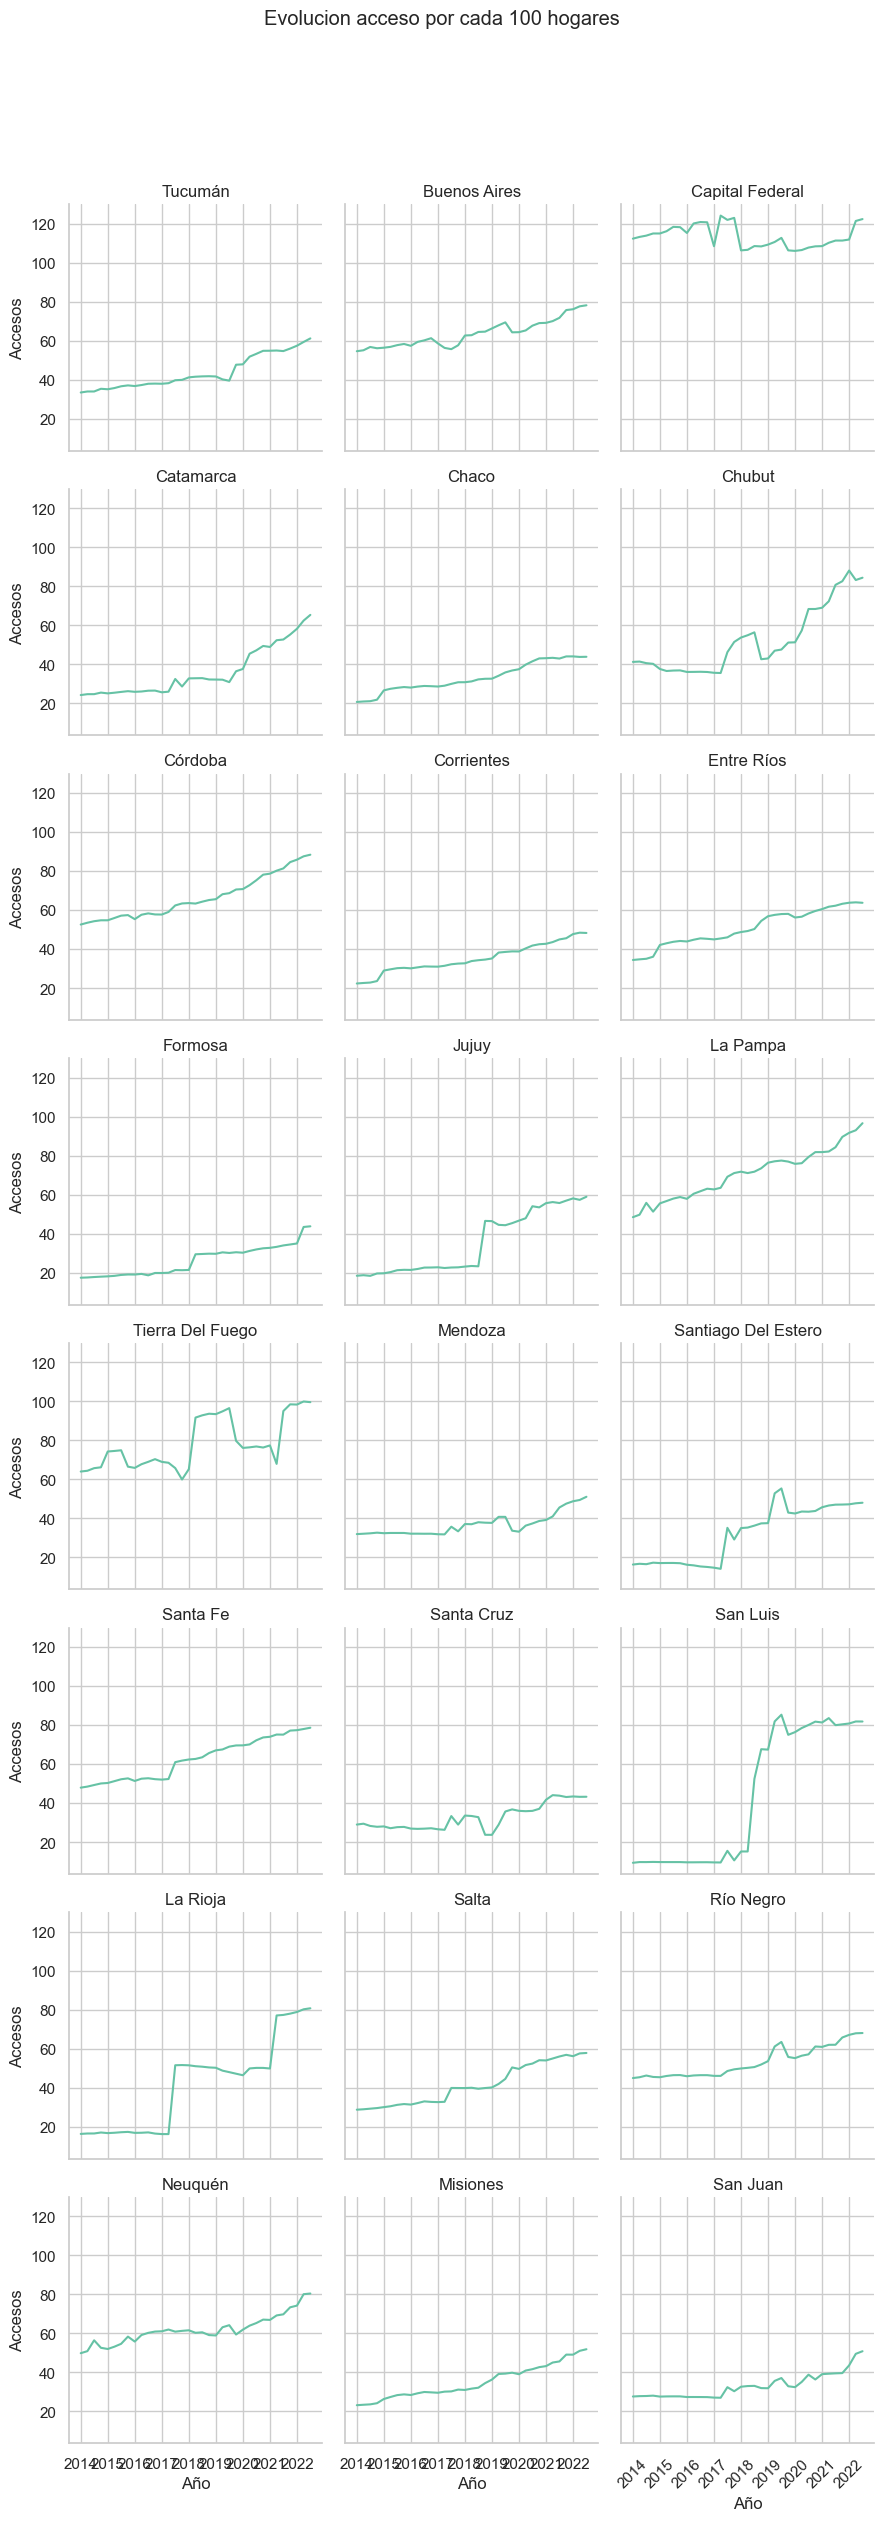

In [469]:
# Crear una cuadrícula de gráficos con 3 columnas
g = sns.FacetGrid(conexiones_pais_provincia, col='provincia', col_wrap=3)

# Mapear cada gráfico con un gráfico de línea
g.map(sns.lineplot, 'trim_anio', 'cada_100_hog')

# Personalizar los gráficos
g.set_titles('{col_name}')
g.set_axis_labels('Año', 'Accesos')
g.fig.suptitle('Evolucion acceso por cada 100 hogares', y=1.05)

plt.xticks(rotation=45)

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



>Observamos que en alguas provincias esta estancado el crecimiento de la cantidad de hogares conectados por cada 100 -  Como en Chaco, Corrientes, Entre Rios, Formosa, Santiago del Estero, Santa Cruz y San Luis.

>Tambien destacamos que en algunas provincias como Misiones, Santa Cruz, Santiago del estero, Formosa, corrientes y chaco la cantidad de accesos es baja, en comparacion con las demas provincias.

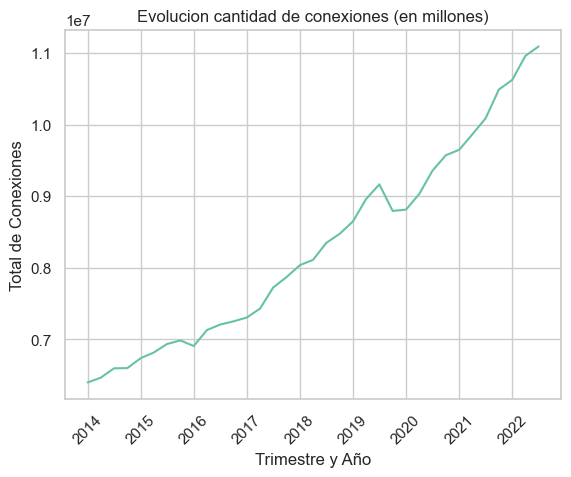

In [470]:
acceso_tecnologia = pd.read_pickle(r'db_eda\acceso_tecnologia.pkl')

x = acceso_tecnologia['trim_anio']
y = acceso_tecnologia['total']

sns.lineplot(x=x, y=y)
plt.title('Evolucion cantidad de conexiones (en millones)')
plt.xlabel('Trimestre y Año')
plt.ylabel('Total de Conexiones')
plt.xticks(rotation=45)

plt.show()


>La evolucion de la cantidad de conexiones a nivel nacional, tiene una correlacion positiva con la evolucion del acceso por cada 100 habitantes.


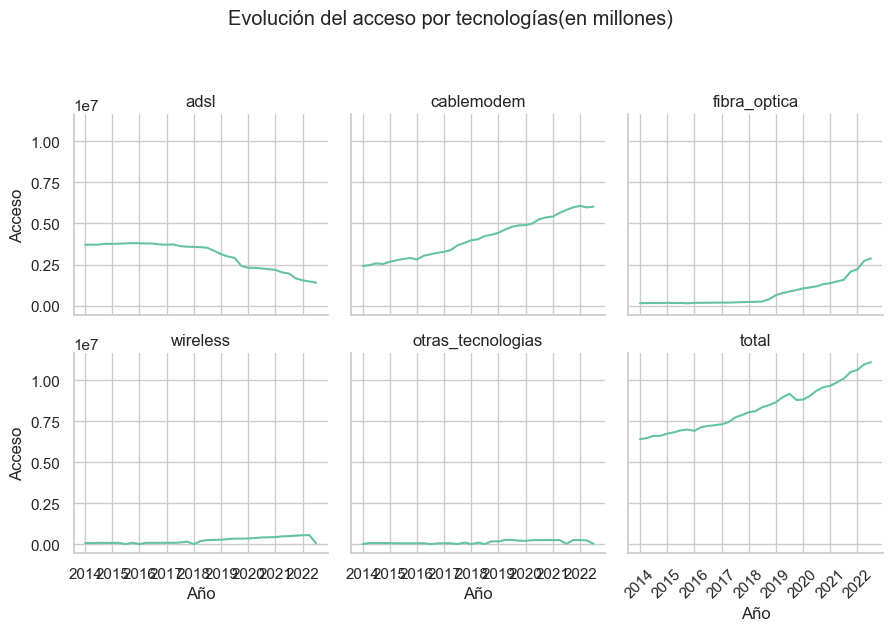

In [471]:
acceso_tecnologia = pd.read_pickle(r'db_eda\acceso_tecnologia.pkl')

columnas_accesos = ['adsl', 'cablemodem', 'fibra_optica', 'wireless', 'otras_tecnologias', 'total']

# Utilizar el método melt para transformar las columnas de acceso en una columna 'Acceso' y una columna 'Valor'
melted_acceso_tecnologia = acceso_tecnologia.melt(id_vars='trim_anio', value_vars=columnas_accesos, var_name='Acceso', value_name='Valor')

# Crear una cuadrícula de gráficos con 3 columnas
g = sns.FacetGrid(melted_acceso_tecnologia, col='Acceso', col_wrap=3)

# Mapear cada gráfico con un gráfico de línea
g.map(plt.plot, 'trim_anio', 'Valor')

# Personalizar los gráficos
g.set_titles('{col_name}')
g.set_axis_labels('Año', 'Acceso')
g.fig.suptitle('Evolución del acceso por tecnologías(en millones)', y=1.05)
plt.xticks(rotation=45)


# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()



>Observo que cablemodem empieza a estancar su cantidad de accesos. Solo fibra optica sigue creciendo

In [472]:
cant_conex_velocidad_localidad = pd.read_pickle(r'db_eda\cant_conex_velocidad_localidad.pkl')
cant_conex_velocidad_localidad.columns

Index(['Provincia', 'Partido', 'Localidad', 'Link Indec', 'Otros',
       'hasta_1_mb', '1_a_5_mb', '6_a_10_mb', '11_a_30_mb', '31_a_50_mb',
       '51_a_100_mb'],
      dtype='object')

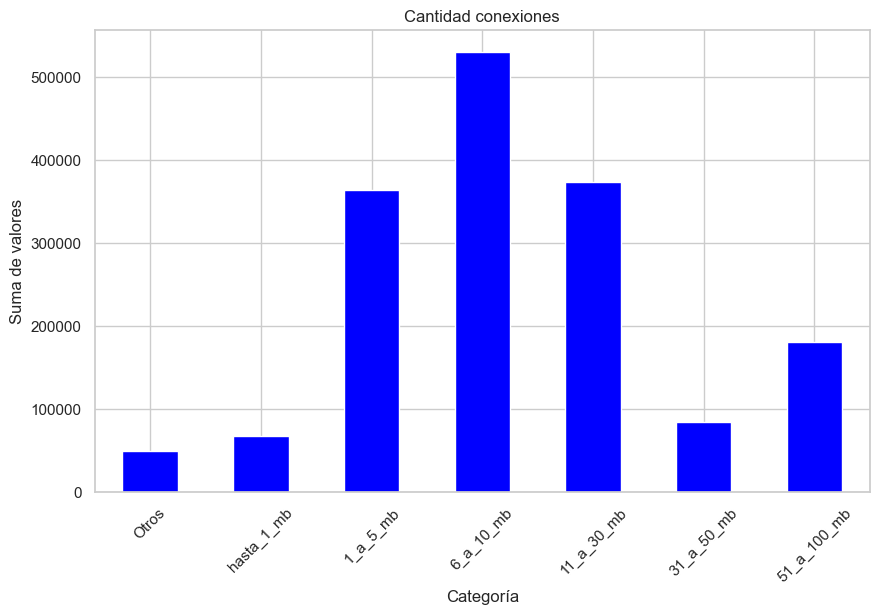

In [473]:

# Sumar los valores de las columnas y almacenarlos en una Serie
suma_valores = cant_conex_velocidad_localidad[['Otros',
       'hasta_1_mb', '1_a_5_mb', '6_a_10_mb', '11_a_30_mb', '31_a_50_mb',
       '51_a_100_mb']].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
suma_valores.plot(kind='bar', color='blue')

# Personalizar el gráfico
plt.title('Cantidad conexiones')
plt.xlabel('Categoría')
plt.ylabel('Suma de valores')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



>Observamos que la mayor cantidad de conexiones varian entre la velocidad de 1 a 30 mbps, siendo estas relativamente bajas para la actualidad

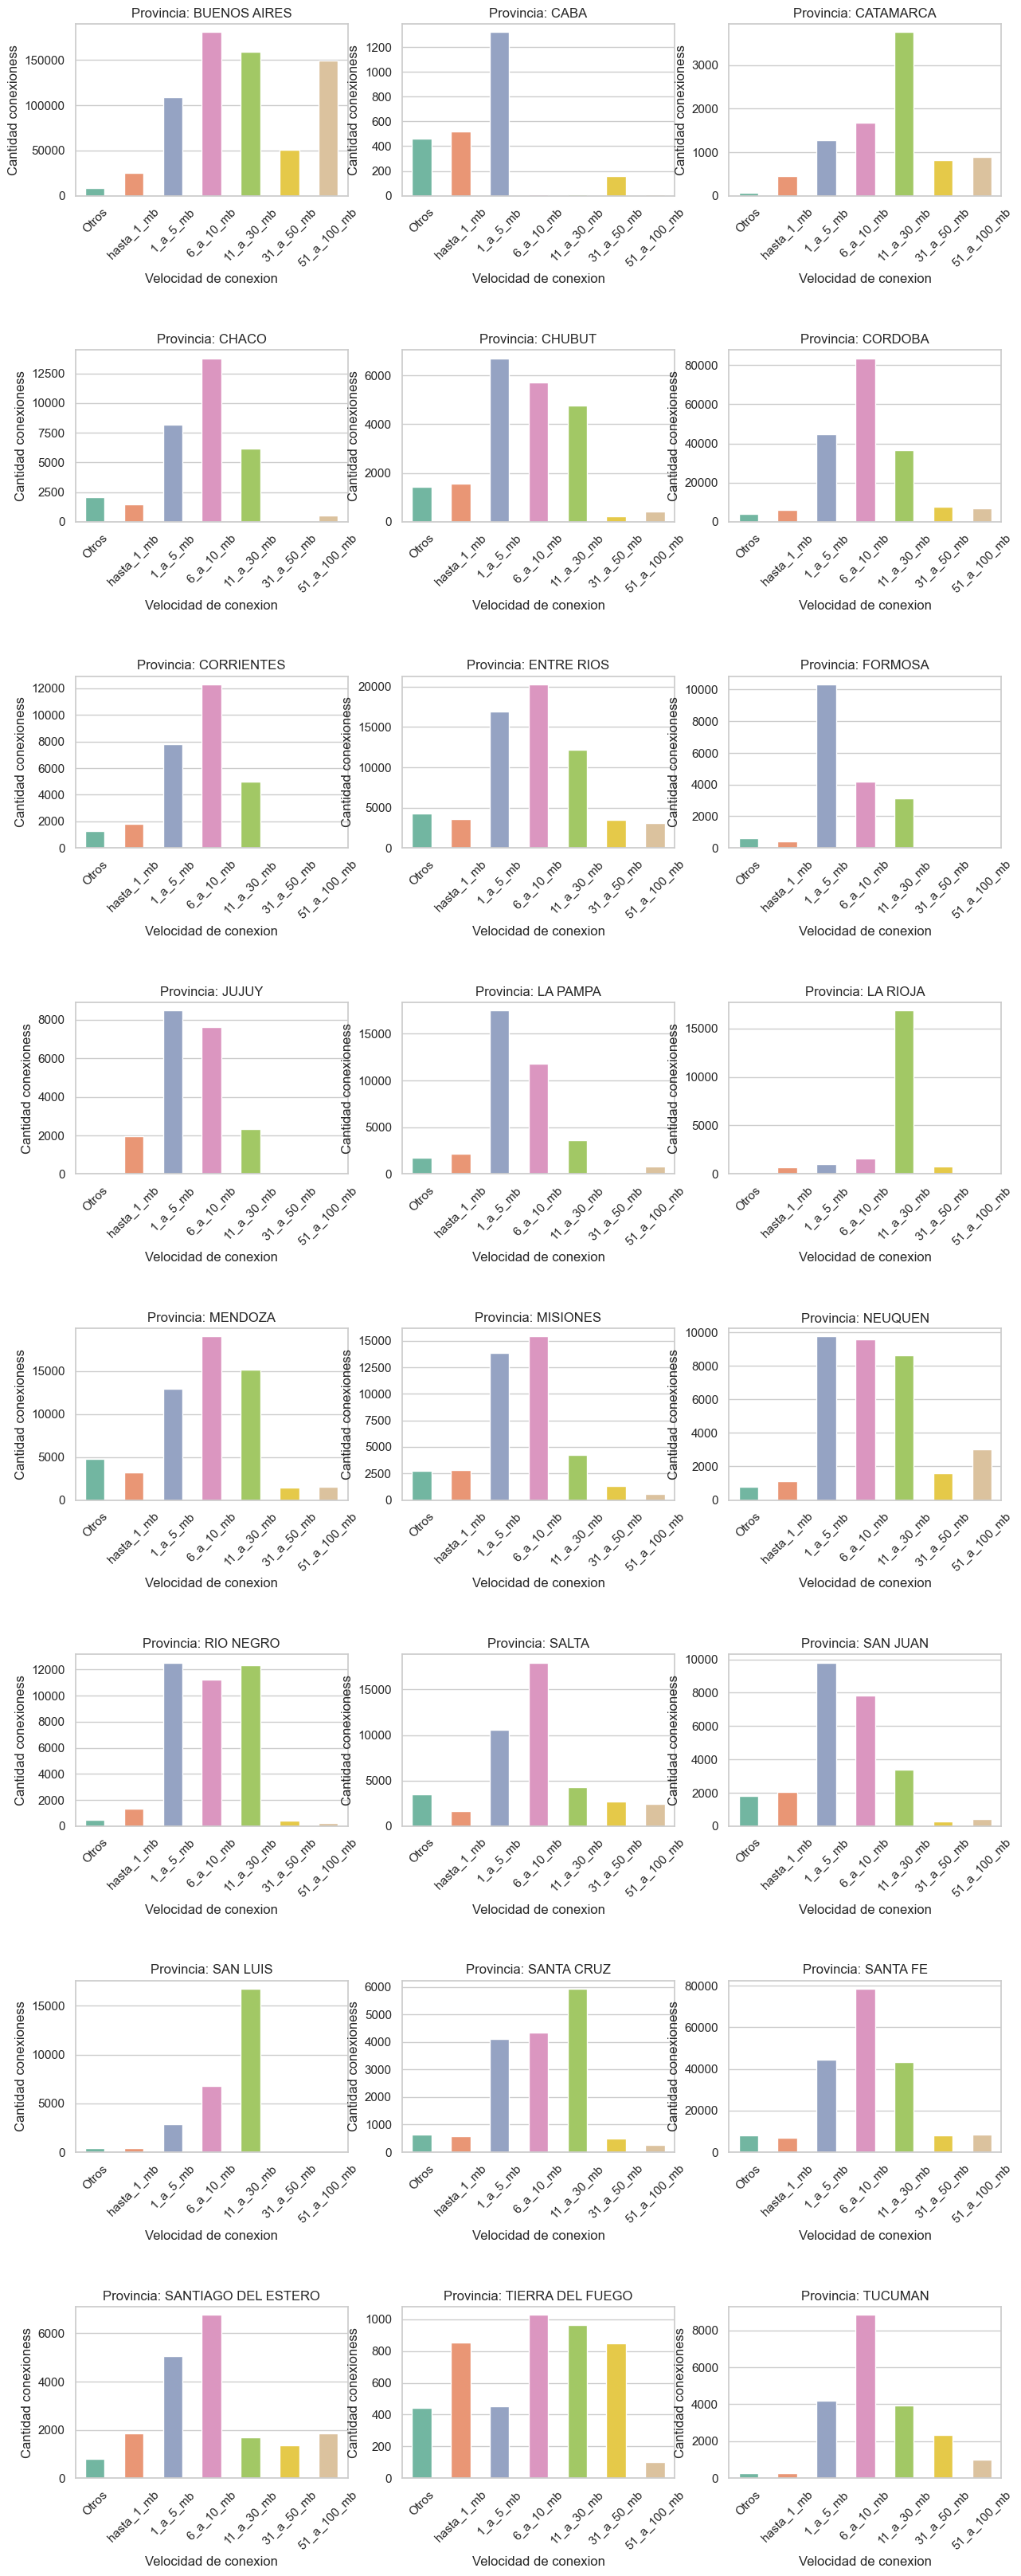

In [474]:
# Obtener los valores únicos de la columna "Provincia"
provincias = cant_conex_velocidad_localidad['Provincia'].unique()

# Calcular el número de filas y columnas necesarias
num_filas = math.ceil(len(provincias) / 3)
num_columnas = min(3, len(provincias))

# Crear la cuadrícula de subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(15, 5*num_filas))
fig.subplots_adjust(hspace=0.9)

# Iterar sobre cada provincia y generar el gráfico de barras correspondiente
for i, provincia in enumerate(provincias):
    # Calcular la posición del gráfico en la cuadrícula
    fila = i // 3
    columna = i % 3
    
    # Filtrar el DataFrame por la provincia actual
    df_provincia = cant_conex_velocidad_localidad[cant_conex_velocidad_localidad['Provincia'] == provincia]
    
    # Sumar los valores de las columnas y almacenarlos en una Serie
    suma_valores = df_provincia[['Otros',
                                 'hasta_1_mb', '1_a_5_mb', '6_a_10_mb', '11_a_30_mb', '31_a_50_mb',
                                 '51_a_100_mb']].sum()
    
    # Asignar el gráfico a la posición correspondiente en la cuadrícula utilizando Seaborn
    if num_filas == 1:
        sns.barplot(x=suma_valores.index, y=suma_valores.values, ax=axs[columna], width=0.5)
        axs[columna].set_title(f'Provincia: {provincia}')
        axs[columna].set_xlabel('Velocidad de conexion')
        axs[columna].set_ylabel('Cantidad conexiones')
        axs[columna].tick_params(axis='x', rotation=45)
    else:
        sns.barplot(x=suma_valores.index, y=suma_valores.values, ax=axs[fila, columna], width=0.5)
        axs[fila, columna].set_title(f'Provincia: {provincia}')
        axs[fila, columna].set_xlabel('Velocidad de conexion')
        axs[fila, columna].set_ylabel('Cantidad conexioness')
        axs[fila, columna].tick_params(axis='x', rotation=45)

# Mostrar los gráficos
plt.show()


>observamos que provincias como cordoba y santa fe, provincias con muchas conexiones, tienen una velocidad promedio entre 6 y 10mb. Siendo esta muy baja en la actualidad. Tambien observo provincias donde no hay velocidades de conexion mayor a 50mb.
Tambien observo que en provincias como Jujuy, La Rioja, Corrientes, San Luis y Formosa, no hay conexiones de mas de 50mbps

In [475]:
ubicacion_poblacion = pd.read_pickle(r'db_eda\ubicacion_poblacion.pkl')
ubicacion_poblacion.to_excel(r'pbi\ubicacion_poblacion.xlsx')
ubicacion_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Provincia     4312 non-null   object
 1   Partido       4312 non-null   object
 2   Localidad     4312 non-null   object
 3   Poblacion     4312 non-null   int64 
 4   Latitud       4312 non-null   object
 5   Longitud      4312 non-null   object
 6   id_ubicacion  4312 non-null   object
dtypes: int64(1), object(6)
memory usage: 235.9+ KB


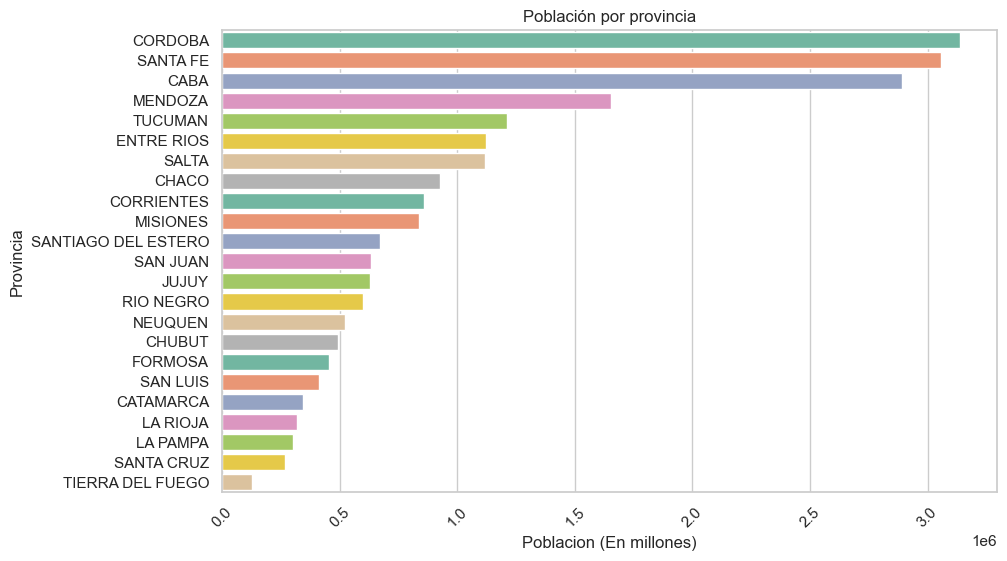

In [476]:
# Agrupar los datos por provincia y sumar la población
agrupado = ubicacion_poblacion.groupby('Provincia')['Poblacion'].sum().reset_index()
agrupado = agrupado[agrupado['Provincia'] != 'BUENOS AIRES']
agrupado = agrupado.sort_values('Poblacion', ascending=False)

# Crear el gráfico de barras
colores = sns.color_palette()
plt.figure(figsize=(10, 6))
sns.barplot(x='Poblacion', y='Provincia', data=agrupado, palette=colores)

ax.set_axisbelow(True)
ax.grid(axis='x', color='lightgray', linestyle='--')

# Personalizar el gráfico
plt.title('Población por provincia')
plt.xlabel('Poblacion (En millones)')
plt.ylabel('Provincia')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


<div class="alert alert-block alert-success">
<b>Nota:</b> Observamos la cantidad de poblacion por provincia. Quitando Bs As, cordoba es la provincia con mayor poblacion. Hemos visto que la cantidad de accesos por poblacion es alta, pero la velocidad promedio es baja. Esto puede ser un indicador de que la infraestructura no esta preparada para la cantidad de accesos que tiene o la tenologia disponible, no permite una velocidad mayor. Tambien observo provincias con buena densidad de poblacion, como mendoza y entre rios no tienen conexiones de mas de 50mbps.
</div>

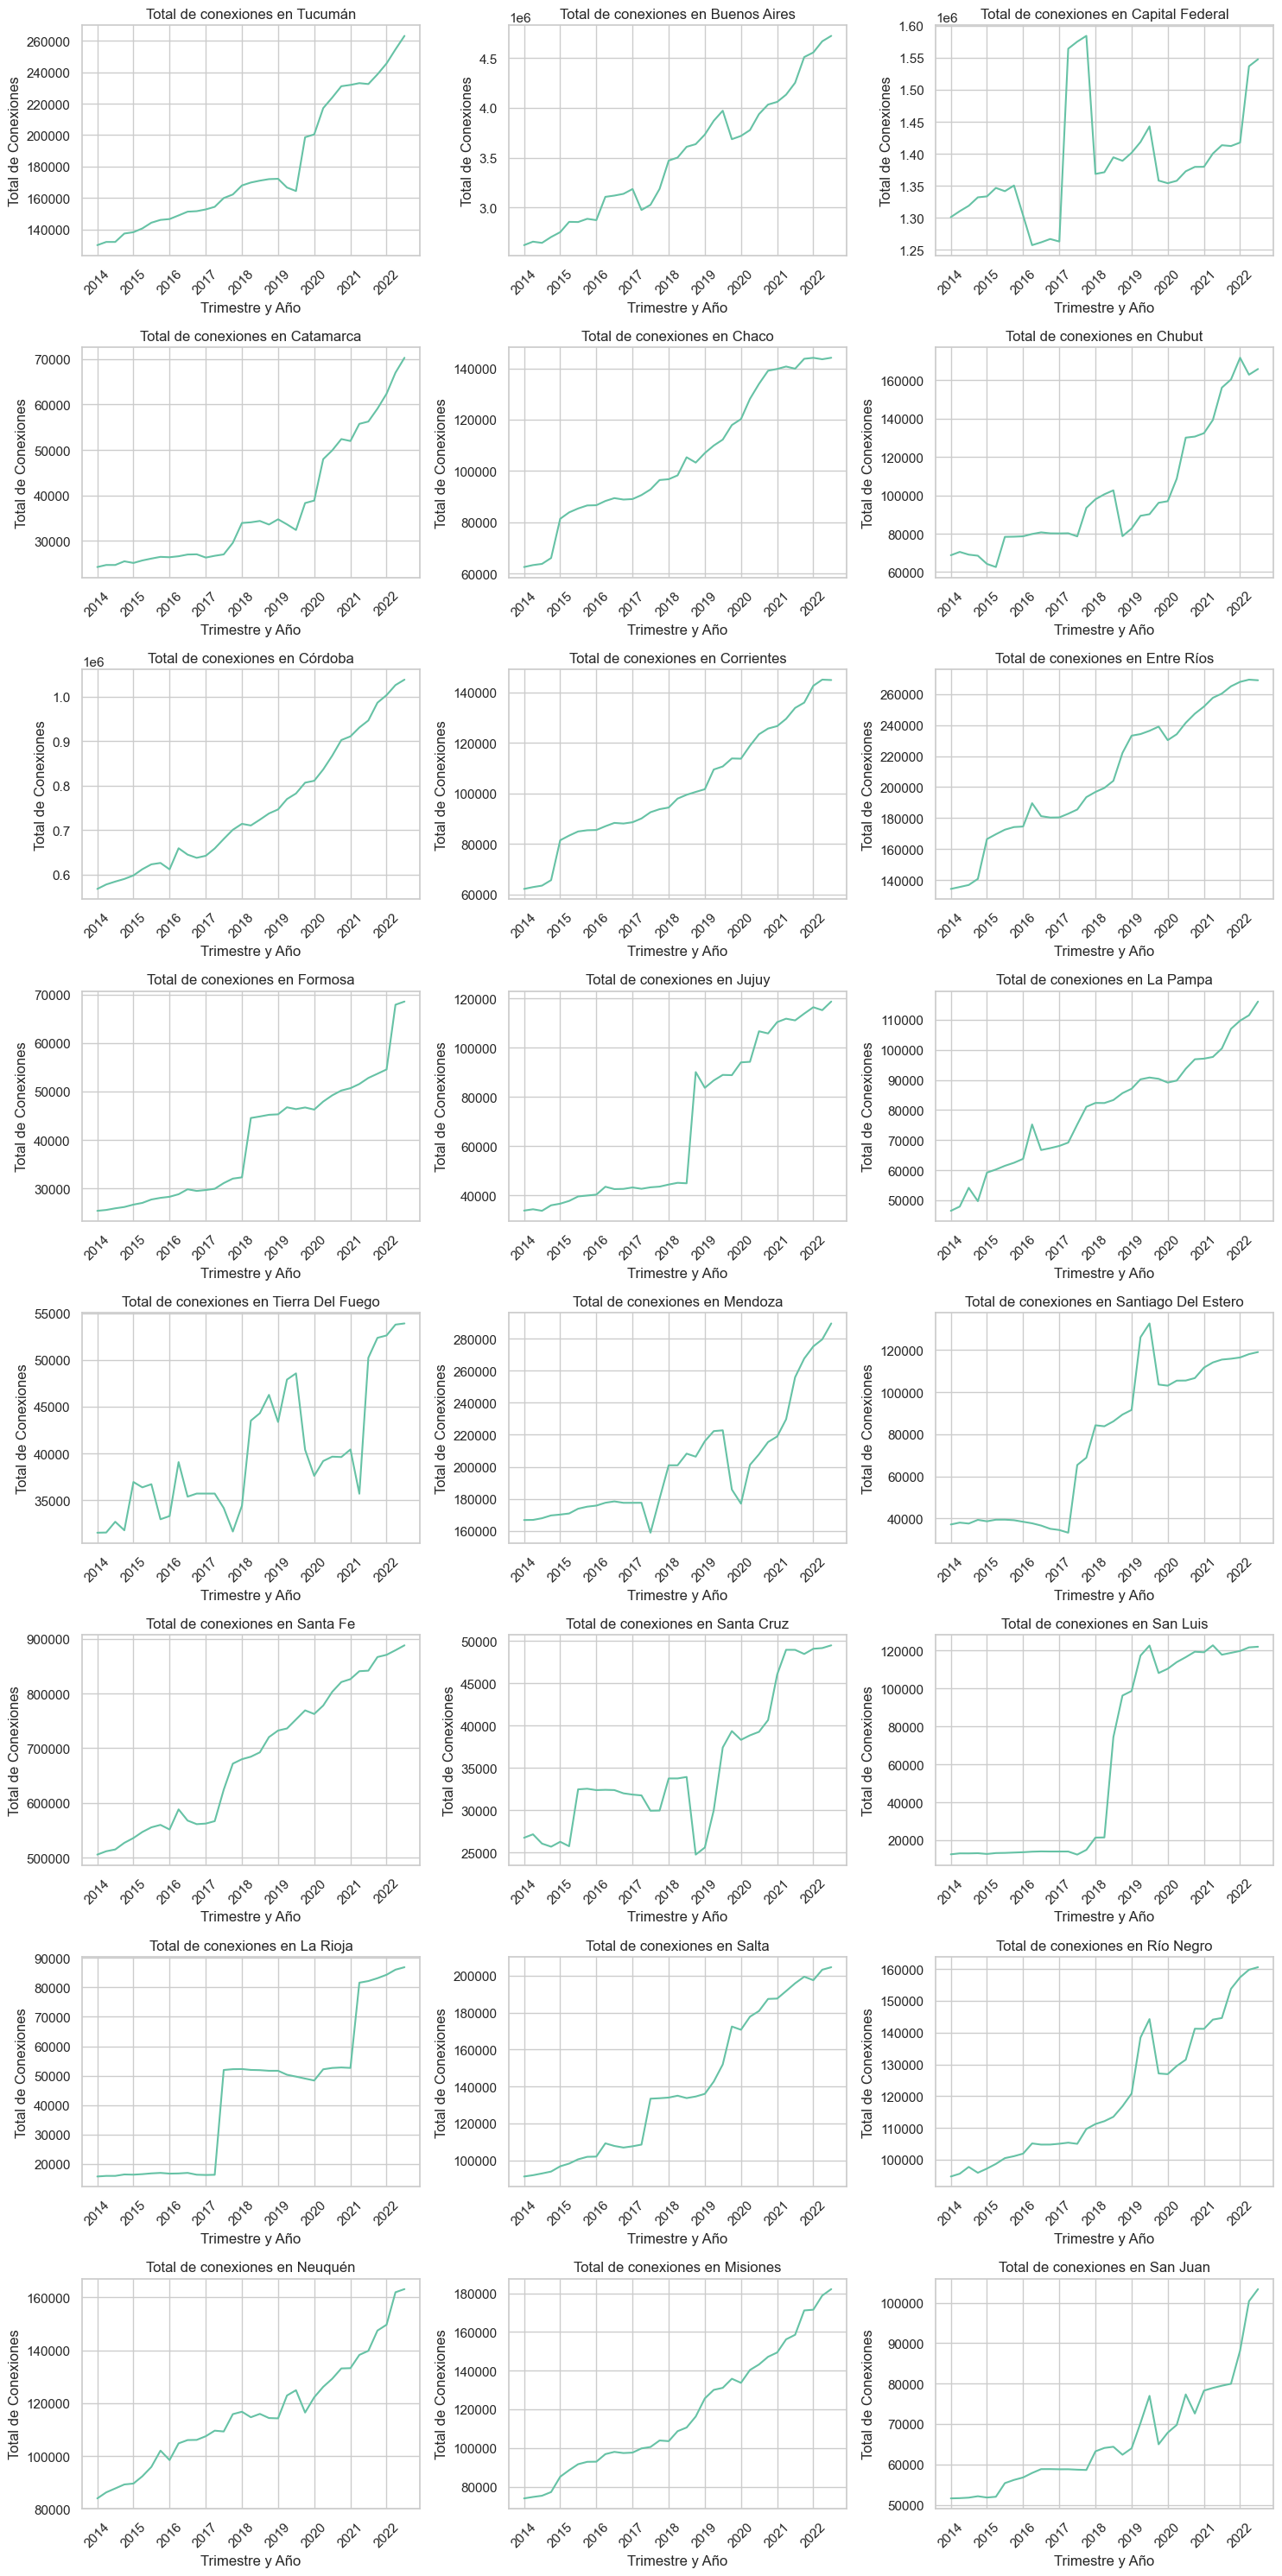

In [477]:
acceso_velocidad = pd.read_pickle(r'db_eda\acceso_velocidad.pkl')
acceso_velocidad_prov = acceso_velocidad['provincia'].unique()

fig, axes = plt.subplots(nrows=len(acceso_velocidad_prov) // 3, ncols=3, figsize=(15, 30))

for i, provincia in enumerate(acceso_velocidad_prov):
    ax = axes[i // 3, i % 3]
    data_provincia = acceso_velocidad[acceso_velocidad['provincia'] == provincia]
    sns.lineplot(data=data_provincia, x='trim_anio', y='total', ax=ax)
    ax.set_title(f'Total de conexiones en {provincia}')
    ax.set_xlabel('Trimestre y Año')
    ax.set_ylabel('Total de Conexiones')
    ax.tick_params(axis='x', rotation=45)

# Ajusta el espacio entre los subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


>Obsesrvo que en lineas generales la evolucion de las conexiones en las provincias es positiva, exceptuando San Luis, Santa Cruz, Santiago del Estero y Chaco, la evolucion se vio estancada en los ultimos 3 años, y en Entre Rios y Corrientes, aparentemente comienza a estancarse.

In [478]:
print(acceso_velocidad['provincia'].unique())

['Tucumán' 'Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut'
 'Córdoba' 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'Tierra Del Fuego' 'Mendoza' 'Santiago Del Estero' 'Santa Fe'
 'Santa Cruz' 'San Luis' 'La Rioja' 'Salta' 'Río Negro' 'Neuquén'
 'Misiones' 'San Juan']


In [479]:
acceso_velocidad_cba = acceso_velocidad[acceso_velocidad['provincia'] == 'Córdoba']
acceso_velocidad_cba = acceso_velocidad.drop(columns=['total', 'provincia'])
acceso_velocidad_sfe = acceso_velocidad[acceso_velocidad['provincia'] == 'Santa Fe']

In [480]:
acceso_velocidad_cba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 839 to 0
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   anio             840 non-null    int64         
 1   trimestre        840 non-null    int64         
 2   hasta_512_kbps   840 non-null    int32         
 3   512_kbps_1_mbps  840 non-null    int32         
 4   1_mbps_6_mbps    840 non-null    int32         
 5   6_mbps_10_mbps   840 non-null    int32         
 6   10_mbps_20_mbps  840 non-null    int32         
 7   20_mbps_30_mbps  840 non-null    int32         
 8   mas_30_mbps      840 non-null    int32         
 9   otros            840 non-null    int32         
 10  trim_anio        840 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(8), int64(2)
memory usage: 52.5 KB


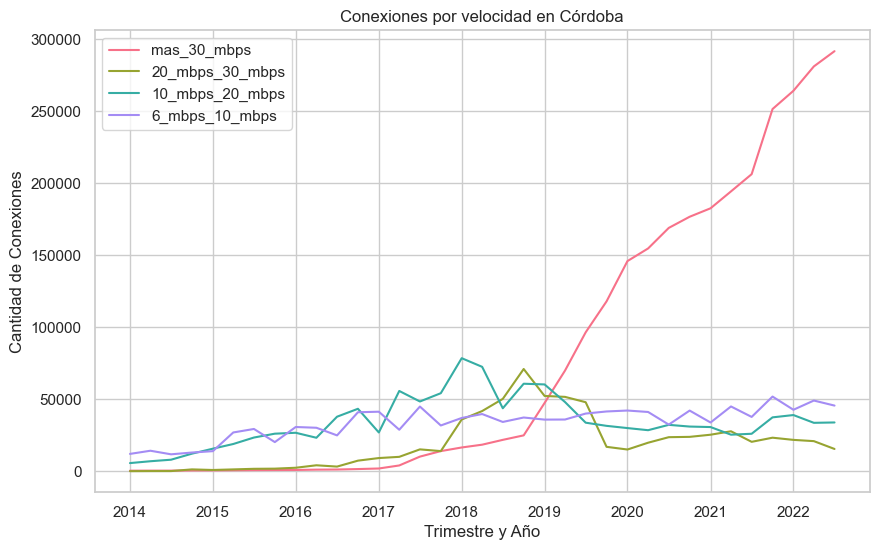

In [481]:
plt.figure(figsize=(10, 6))
columns_to_plot = ['mas_30_mbps', '20_mbps_30_mbps', '10_mbps_20_mbps', '6_mbps_10_mbps']  # Columnas seleccionadas
colors = sns.color_palette('husl', n_colors=len(columns_to_plot))
for i, column in enumerate(columns_to_plot):
    sns.lineplot(data=acceso_velocidad_cba, x='trim_anio', y=column, color=colors[i], label=column, errorbar=None)

# Configurar título y etiquetas de los ejes
plt.title('Conexiones por velocidad en Córdoba')
plt.xlabel('Trimestre y Año')
plt.ylabel('Cantidad de Conexiones')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



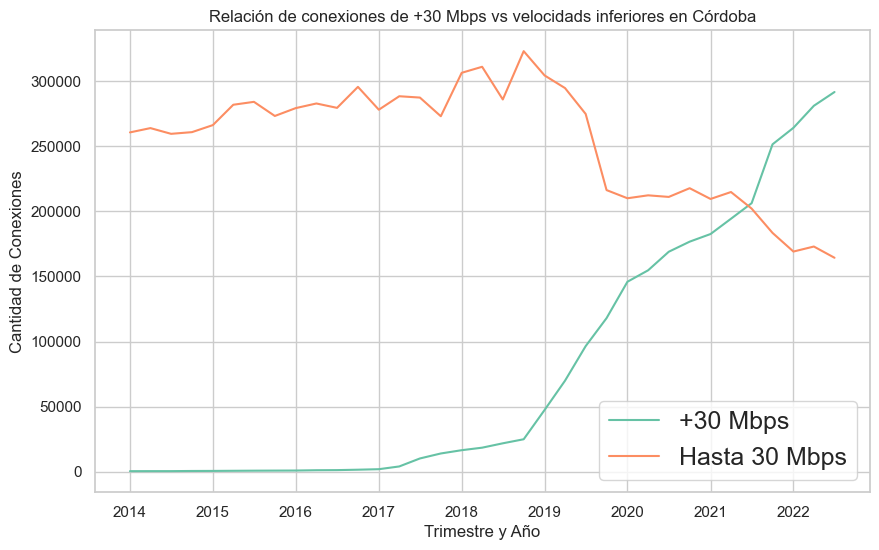

In [482]:
# Filtrar las columnas de interés
data_plot = acceso_velocidad_cba[['trim_anio', 'mas_30_mbps', 'hasta_512_kbps', '512_kbps_1_mbps', '1_mbps_6_mbps', '6_mbps_10_mbps', '10_mbps_20_mbps', '20_mbps_30_mbps', 'otros']]
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear las líneas para las conexiones de más de 30 Mbps y otras velocidades
sns.lineplot(data=data_plot, x='trim_anio', y='mas_30_mbps', label='+30 Mbps', errorbar=None)
sns.lineplot(data=data_plot, x='trim_anio', y=data_plot.iloc[:, 3:].sum(axis=1), label='Hasta 30 Mbps', errorbar=None)


# Configurar título y etiquetas de los ejes
plt.title('Relación de conexiones de +30 Mbps vs velocidads inferiores en Córdoba')
plt.xlabel('Trimestre y Año')
plt.ylabel('Cantidad de Conexiones')

# Mostrar la leyenda
plt.legend(loc='lower right', fontsize=18)

# Mostrar el gráfico
plt.show()



<div class="alert alert-block alert-danger">
<b>Observacion:</b> La demanda de velocidades superiores a 30mb es alta. Esto puede ser un indicador de que el alcance de la red no es suficiente para la provincia.
</div>

In [483]:
#creamos dataframe conectividad_internet
conectividad_internet = pd.read_pickle(r'db_eda\conectividad_internet.pkl')

# cuento en la provincia de CORDOBA cuantos partidos tienen 1 en FIBRAOPTICA y cuantos 0
conectividad_internet[conectividad_internet['Provincia'] == 'CORDOBA']['FIBRAOPTICA'].value_counts()



FIBRAOPTICA
0    384
1    172
Name: count, dtype: int64

`Las localidades de Cordoba con acceso a Fibra Optica, son solo 172 de 384`

In [484]:
conectividad_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   int32  
 5   CABLEMODEM     4312 non-null   int32  
 6   DIALUP         4312 non-null   int32  
 7   FIBRAOPTICA    4312 non-null   int32  
 8   SATELITAL      4312 non-null   int32  
 9   WIRELESS       4312 non-null   int32  
 10  TELEFONIAFIJA  4312 non-null   int32  
 11  3G             4312 non-null   int32  
 12  4G             4312 non-null   int32  
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int32(9), int64(1), object(5)
memory usage: 387.5+ KB


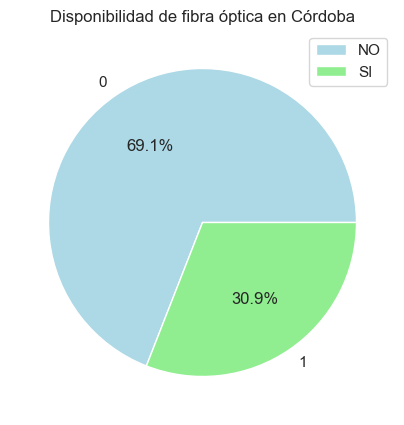

In [485]:
# genero grafico de torta para la provincia de CORDOBA

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
conectividad_internet[conectividad_internet['Provincia'] == 'CORDOBA']['FIBRAOPTICA'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])

# Personalizar el gráfico
plt.title('Disponibilidad de fibra óptica en Córdoba')
plt.ylabel('')
plt.legend(['NO', 'SI'])

# Mostrar el gráfico
plt.show()


<div class="alert alert-block alert-info">
Solo el 30% de las localidades de cordoba tienen acceso a fibra optica.
</div>

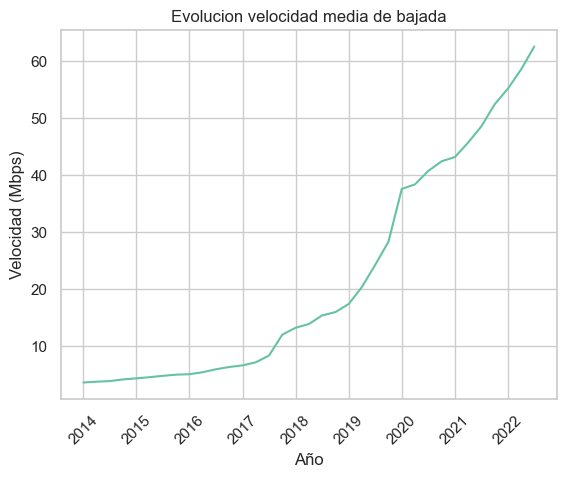

In [486]:
historico_velocidad_internet = pd.read_pickle(r'db_eda\historico_velocidad_internet.pkl')

# Crear el gráfico de línea
plt.plot(historico_velocidad_internet['trim_anio'], historico_velocidad_internet['mbps_media_bajada'])

# Personalizar el gráfico
plt.title('Evolucion velocidad media de bajada')
plt.xlabel('Año')
plt.ylabel('Velocidad (Mbps)')
plt.xticks(rotation=45)
plt.show()



`La evolucion de la media de velocidad de bajada del pais, esta en constante crecimiento, siendo la actual por encima de 60mb`

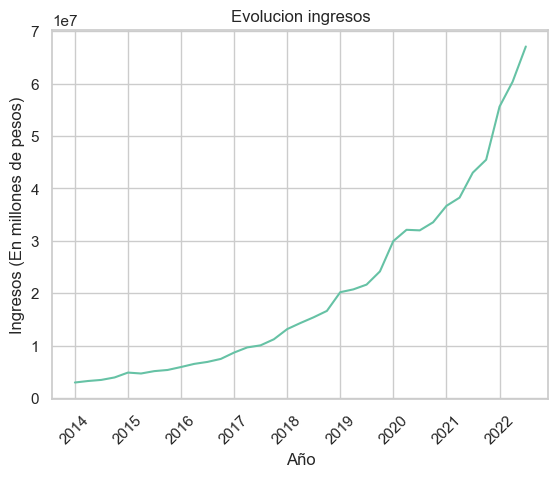

In [487]:
internet_ingresos = pd.read_pickle(r'db_eda\internet_ingresos.pkl')

# Crear el gráfico de línea
plt.plot(internet_ingresos['trim_anio'], internet_ingresos['ingresos'])

# Personalizar el gráfico
plt.title('Evolucion ingresos')
plt.xlabel('Año')
plt.ylabel('Ingresos (En millones de pesos)')

plt.xticks(rotation=45)
plt.show()




`Observamos que la correlacion entre la evolucion de los ingresos y el aumento de velocidad de bajada, es alta. Esto es un indicador de la aceptacion de las velocidades superiores a 30mb.`

In [488]:
conexiones_pais_100 = pd.read_pickle(r'db_eda\conexiones_pais_100.pkl')
historico_velocidad_internet = pd.read_pickle(r'db_eda\historico_velocidad_internet.pkl')
acceso_tecnologia = pd.read_pickle(r'db_eda\acceso_tecnologia.pkl')
internet_ingresos = pd.read_pickle(r'db_eda\internet_ingresos.pkl')

historico_velocidad_internet.rename(columns={'Trimestre.1': 'periodo'}, inplace=True)
internet_ingresos.rename(columns={'Periodo': 'periodo'}, inplace=True)
df_pbi_tiempo = conexiones_pais_100.copy()
columnas_hist_velocidad = ['mbps_media_bajada']
columnas_acceso_tecnologia = ['adsl', 'cablemodem', 'fibra_optica', 'wireless', 'otras_tecnologias', 'total']
columnas_internet_ingresos = ['ingresos']

df_pbi_tiempo = df_pbi_tiempo.merge(historico_velocidad_internet[columnas_hist_velocidad + ['periodo']], on='periodo')
df_pbi_tiempo = df_pbi_tiempo.merge(acceso_tecnologia[columnas_acceso_tecnologia + ['periodo']], on='periodo')
df_pbi_tiempo = df_pbi_tiempo.merge(internet_ingresos[columnas_internet_ingresos + ['periodo']], on='periodo')
df_pbi_tiempo.to_excel(r'pbi\df_pbi_tiempo.xlsx' , index=False)

In [489]:
import hashlib

cant_conex_velocidad_localidad = pd.read_pickle(r'db_eda\cant_conex_velocidad_localidad.pkl')
conectividad_internet = pd.read_pickle(r'db_eda\conectividad_internet.pkl')
conectividad_internet['id_ubicacion'] = conectividad_internet['Latitud'].astype(str) + conectividad_internet['Longitud'].astype(str)
conectividad_internet['id_ubicacion'] = conectividad_internet['id_ubicacion'].apply(lambda x: hashlib.sha1(x.encode()).hexdigest())

# ordeno dataframes por columna partido
cant_conex_velocidad_localidad = cant_conex_velocidad_localidad.sort_values(by=['Localidad'])
conectividad_internet = conectividad_internet.sort_values(by=['Localidad'])

display(cant_conex_velocidad_localidad.head(10), conectividad_internet.head(10))



,Provincia,Partido,Localidad,Link Indec,Otros,hasta_1_mb,1_a_5_mb,6_a_10_mb,11_a_30_mb,31_a_50_mb,51_a_100_mb
677,BUENOS AIRES,Tres De Febrero,11 De Septiembre,6840010,1.0,6.0,14.0,35.0,18.0,197.0,687.0
2078,NEUQUEN,Confluencia,11 de Octubre,58035080,32.0,0.0,0.0,0.0,0.0,418.0,0.0
10,BUENOS AIRES,9 de Julio,12 de Octubre,6588030,NaN,0.0,11.0,0.0,0.0,0.0,0.0
1495,ENTRE RIOS,Uruguay,1º de Mayo,30098090,NaN,0.0,130.0,36.0,0.0,0.0,0.0
337,BUENOS AIRES,La Matanza,20 De Junio,6427010,NaN,3.0,12.0,27.0,10.0,7.0,512.0
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,21.0,230.0,616.0,1289.0,37.0,9.0
1973,MISIONES,25 de Mayo,25 de Mayo,54119060,538.0,2.0,0.0,0.0,0.0,0.0,0.0
1945,MENDOZA,San Rafael,25 de Mayo,50105220,NaN,0.0,3.0,89.0,0.0,0.0,0.0
1725,LA PAMPA,Puelén,25 de Mayo,42112020,18.0,0.0,1846.0,113.0,0.0,0.0,0.0
887,CHUBUT,Gaiman,28 de Julio,26042040,NaN,1.0,0.0,12.0,1.0,0.0,0.0


,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud,id_ubicacion
2758,CORDOBA,Colón,1 De Agosto,0,0,0,0,0,0,0,0,1,1,14021080.0,"-31,306907347736","-64,1785314598263",415170836e86776962b11b24b93683358a0866dc
3056,BUENOS AIRES,Tres De Febrero,11 De Septiembre,4402,1,1,0,1,1,0,1,1,1,6840010.0,"-34,566314345456","-58,6183600679169",39fa386124a421edb9b3bd9ddf2cff2807446544
1994,NEUQUEN,Confluencia,11 de Octubre,236,1,0,0,1,0,0,1,1,1,58035080.0,"-38,878684024658","-68,1001707201744",365d8a1b44c85a54b02d5ffb3a8c275311d2d3f2
4221,BUENOS AIRES,9 de Julio,12 de Octubre,219,0,0,0,0,0,1,1,0,0,6588030.0,"-35,607730780146","-60,9182929927645",80ad973ad32df356ec8e712eca63951d70034c45
4209,BUENOS AIRES,Azul,16 de Julio,111,0,0,0,0,0,0,0,1,1,6049050.0,"-37,2020524773603","-60,1652139181813",ea60f1e7582efcdf6541e61fddc3f001a1b43ae3
3387,BUENOS AIRES,Puán,17 de Agosto,319,0,0,0,0,0,0,1,0,0,6651040.0,"-37,9086924428976","-62,9360284730803",fb1fb59164b5afea4a895a9a1666add24d5492d7
3798,ENTRE RIOS,Uruguay,1º de Mayo,696,0,0,0,1,0,1,1,0,0,30098090.0,"-32,2570116072534","-58,422728628517",c370d224d2d1b6af5e5142e9fceecca70dae922c
3460,MISIONES,Cainguás,1º de Mayo,403,0,0,0,0,0,0,0,0,1,54014060.0,"-27,1660848947706","-55,029165269622",0a43caf4a977a3226ee7daeed2a5bc84d7ddebf4
3229,BUENOS AIRES,La Matanza,20 De Junio,1171,1,1,1,0,0,1,1,1,1,6427010.0,"-34,7855336508384","-58,7171850019077",022eb01946f1d70a8261ae7bab833342ff861cf1
4211,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,1,1,0,0,1,1,1,1,1,6854100.0,"-35,4339385892588","-60,1731209454056",0cbc34109d1b7c76a33a4eee4f88256bb09c8ae9


In [490]:
cant_conex_velocidad_localidad.to_excel(r'pbi\cant_conex_velocidad_localidad.xlsx' , index=False)

In [491]:
suma_columnas = conectividad_internet[['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', 'SATELITAL', 'WIRELESS']].sum(axis=1)

filas_suma_cero = conectividad_internet[suma_columnas == 0]

localidades_sin_conexion = filas_suma_cero.copy()

conectividad_internet = conectividad_internet.drop(filas_suma_cero.index)

conectividad_internet.to_excel(r'pbi\conectividad_internet.xlsx' , index=False)
localidades_sin_conexion.to_excel(r'pbi\localidades_sin_conexion.xlsx' , index=False)

display(localidades_sin_conexion.head(10), conectividad_internet.head(10), conectividad_internet.info(), localidades_sin_conexion.info())



<class 'pandas.core.frame.DataFrame'>
Index: 3050 entries, 3056 to 332
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3050 non-null   object 
 1   Partido        3050 non-null   object 
 2   Localidad      3050 non-null   object 
 3   Poblacion      3050 non-null   int64  
 4   ADSL           3050 non-null   int32  
 5   CABLEMODEM     3050 non-null   int32  
 6   DIALUP         3050 non-null   int32  
 7   FIBRAOPTICA    3050 non-null   int32  
 8   SATELITAL      3050 non-null   int32  
 9   WIRELESS       3050 non-null   int32  
 10  TELEFONIAFIJA  3050 non-null   int32  
 11  3G             3050 non-null   int32  
 12  4G             3050 non-null   int32  
 13  link           3050 non-null   float64
 14  Latitud        3050 non-null   object 
 15  Longitud       3050 non-null   object 
 16  id_ubicacion   3050 non-null   object 
dtypes: float64(1), int32(9), int64(1), object(6)
memory usa

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud,id_ubicacion
2758,CORDOBA,Colón,1 De Agosto,0,0,0,0,0,0,0,0,1,1,14021080.0,"-31,306907347736","-64,1785314598263",415170836e86776962b11b24b93683358a0866dc
4209,BUENOS AIRES,Azul,16 de Julio,111,0,0,0,0,0,0,0,1,1,6049050.0,"-37,2020524773603","-60,1652139181813",ea60f1e7582efcdf6541e61fddc3f001a1b43ae3
3387,BUENOS AIRES,Puán,17 de Agosto,319,0,0,0,0,0,0,1,0,0,6651040.0,"-37,9086924428976","-62,9360284730803",fb1fb59164b5afea4a895a9a1666add24d5492d7
3460,MISIONES,Cainguás,1º de Mayo,403,0,0,0,0,0,0,0,0,1,54014060.0,"-27,1660848947706","-55,029165269622",0a43caf4a977a3226ee7daeed2a5bc84d7ddebf4
1496,SAN LUIS,General Pedernera,5Ta Brigada,0,0,0,0,0,0,0,0,0,0,74035055.0,"-33,7239942428561","-65,3810379035533",bdb51a8b3423087684892fde0ee86beb1004d399
1902,MISIONES,Eldorado,9 de Julio,339,0,0,0,0,0,0,1,0,0,54042040.0,"-26,4302810162412","-54,4664666896921",f5caaf97f1d25945368f106afd16c2866efad417
3750,CORRIENTES,San Roque,9 de Julio (Est. Pueblo 9 de Julio),2209,0,0,0,0,0,0,1,0,1,18161030.0,"-28,8418348631681","-58,8280463835778",3c9f21784f6b597b8839460e765e8e39d84dec62
1903,MISIONES,Eldorado,9 de Julio Kilómetro 20,1528,0,0,0,0,0,0,0,0,1,54042050.0,"-26,4145333109522","-54,4976116231155",8db3a322e32a8739774063016522b146fb9714f3
2179,MENDOZA,Junín,ALTO VERDE,0,0,0,0,0,0,0,0,0,0,50035050.0,"-33,15452764","-68,35591009",e963460e14eb8edf8b365f302fd020dccc850963
2312,JUJUY,Cochinoca,Abdón Castro Tolay,279,0,0,0,0,0,0,0,0,0,38007010.0,"-23,3386411031225","-66,0901432282825",409dcaeefc586c38803cb990d9ab0bb2a8318502


,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud,id_ubicacion
3056,BUENOS AIRES,Tres De Febrero,11 De Septiembre,4402,1,1,0,1,1,0,1,1,1,6840010.0,"-34,566314345456","-58,6183600679169",39fa386124a421edb9b3bd9ddf2cff2807446544
1994,NEUQUEN,Confluencia,11 de Octubre,236,1,0,0,1,0,0,1,1,1,58035080.0,"-38,878684024658","-68,1001707201744",365d8a1b44c85a54b02d5ffb3a8c275311d2d3f2
4221,BUENOS AIRES,9 de Julio,12 de Octubre,219,0,0,0,0,0,1,1,0,0,6588030.0,"-35,607730780146","-60,9182929927645",80ad973ad32df356ec8e712eca63951d70034c45
3798,ENTRE RIOS,Uruguay,1º de Mayo,696,0,0,0,1,0,1,1,0,0,30098090.0,"-32,2570116072534","-58,422728628517",c370d224d2d1b6af5e5142e9fceecca70dae922c
3229,BUENOS AIRES,La Matanza,20 De Junio,1171,1,1,1,0,0,1,1,1,1,6427010.0,"-34,7855336508384","-58,7171850019077",022eb01946f1d70a8261ae7bab833342ff861cf1
4211,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,1,1,0,0,1,1,1,1,1,6854100.0,"-35,4339385892588","-60,1731209454056",0cbc34109d1b7c76a33a4eee4f88256bb09c8ae9
1843,MENDOZA,San Rafael,25 de Mayo,1450,0,1,1,0,0,1,1,1,1,50105220.0,"-34,5859138924719","-68,5495682219631",e0d5c06a5b22b651a542d2eb874f3bd1dcb02c13
1861,MISIONES,25 de Mayo,25 de Mayo,3838,0,0,0,0,1,0,1,0,1,54119060.0,"-27,3715719938072","-54,7475224881518",7042981108e231782adae365ccc7538b4337d689
2435,LA PAMPA,Puelén,25 de Mayo,7878,0,0,0,1,0,1,1,1,1,42112020.0,"-37,7697053748681","-67,7172958236186",d428cfe79072e9c49d3f2eba07aafd8e94e433cf
63,CHUBUT,Gaiman,28 de Julio,237,0,0,0,1,1,0,0,1,1,26042040.0,"-43,3809771295585","-65,8386877428492",9bda1733aa688447d96b6cd9fb16ba1936774928


None

None

In [492]:
acceso_velocidad = pd.read_pickle(r'db_eda\acceso_velocidad.pkl')
conexiones_pais_provincia = pd.read_pickle(r'db_eda\conexiones_pais_provincia.pkl')

acceso_velocidad.to_excel(r'pbi\acceso_velocidad.xlsx' , index=False)
conexiones_pais_provincia.to_excel(r'pbi\conexiones_pais_provincia.xlsx' , index=False)